   **PIA** 

**ESTADISTICA APLICADA**

Miguel Angel Jalomo Hernandez 1857876

Veronica Vanessa Aguilar Ortiz 1855188

In [252]:
# Librerias
import numpy as np
import pandas as pd 
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA


%matplotlib inline

In [253]:
#fijamos tamaño de graficas
plt.rcParams['figure.figsize'] = [15, 7.5]

In [254]:
datos= pd.read_csv('C:/Users/migue/Downloads/IGAE3.csv' ,index_col='Periodo',parse_dates=True)

In [255]:
datos.dropna(inplace=True)

In [256]:
#vemos los ultimos 10 datos
datos.tail(10)

,IGAE
Periodo,
2021-05-01,111.980980
2021-06-01,111.110974
2021-07-01,109.853143
2021-08-01,107.148949
2021-09-01,104.134227
2021-10-01,108.358461
2021-11-01,112.694729
2021-12-01,112.152267
2022-01-01,107.249365


In [257]:
type(datos.index)

pandas.core.indexes.datetimes.DatetimeIndex

**Series de tiempo**

1. Añadirás una primera parte a la notebook llamada introducción. Hablaras
de la serie de tiempo que te toco analizar: ¿qué mide? ¿la frecuencia de
los datos? ¿se observa alguna tendencia? Y se puede añadir la gráfica de
la serie.


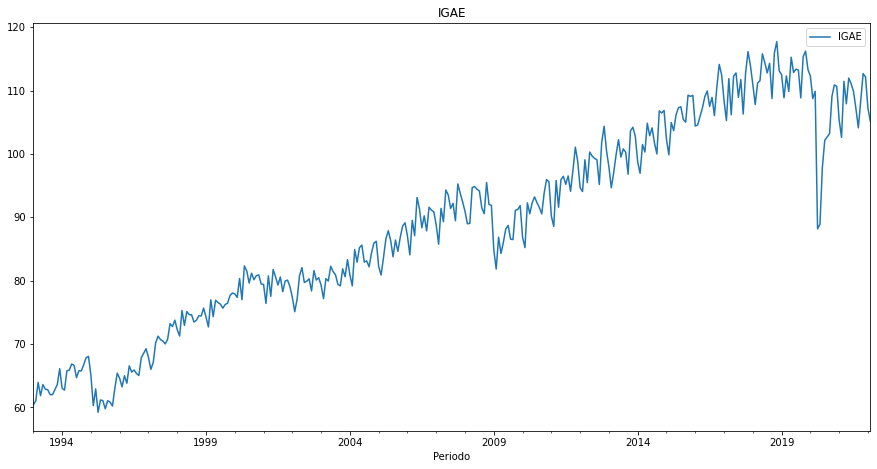

In [258]:
# Vamos a graficar
datos.plot()
plt.title('IGAE')
plt.show()

2. Comenta acerca de si se observa cierta estacionalidad en la serie, en que
meses aumenta la variable ¿por qué?, en qué meses disminuye la variable
¿por qué?


3. Uno los propósitos fundamentales del análisis de series de tiempo es el
pronóstico, es decir, “anticipar valores futuros de la variable”. Comenta
para quién es importante conocer el pronostico de la serie de tiempo que
analizaras y por qué es importante conocer el pronóstico de dicha serie
de tiempo.


4. Añade las estadísticas descriptivas de la serie de tiempo (guíate de la
notebook del análisis de las acciones de waltmart)


In [259]:
## Calcular los retornos
datos['retorno_simple'] = datos.IGAE.pct_change()

In [260]:
print('Numero de observaciones:', datos.shape[0])
print(f'Media: {datos.retorno_simple.mean():.4f}')
print(f'Mediana: {datos.retorno_simple.median():.4f}')
print(f'Mínimo: {datos.retorno_simple.min():.4f}')
print(f'Máximo: {datos.retorno_simple.max():.4f}')
print(f'Desviación Estándar: {datos.retorno_simple.std():.4f}')
print(f'Skewness (símetría): {datos.retorno_simple.skew():.4f}') ## que tan centrada esta la dist
print(f'Kurtosis: {datos.retorno_simple.kurtosis():.4f}')     ## que tan alta esta la dist

Numero de observaciones: 350
Media: 0.0021
Mediana: -0.0016
Mínimo: -0.1976
Máximo: 0.1005
Desviación Estándar: 0.0329
Skewness (símetría): -0.2042
Kurtosis: 3.2990


5. Para ver mejor el comportamiento de la variable aplica un promedio
móvil (3-6 meses)


In [261]:
# Vamos a calcular el promedio movil de la acción a 3 y 6 meses

datos['MA3'] = datos['IGAE'].rolling(90).mean()
datos['MA6'] = datos['IGAE'].rolling(180).mean()
datos = datos.dropna()
datos.head()

,IGAE,retorno_simple,MA3,MA6
Periodo,,,,
2007-12-01,92.457199,-0.014413,83.954806,76.394175
2008-01-01,90.954348,-0.016255,84.080635,76.563879
2008-02-01,88.989333,-0.021604,84.167286,76.719250
2008-03-01,89.053256,0.000718,84.266046,76.858750
2008-04-01,94.715328,0.063581,84.420554,77.041247


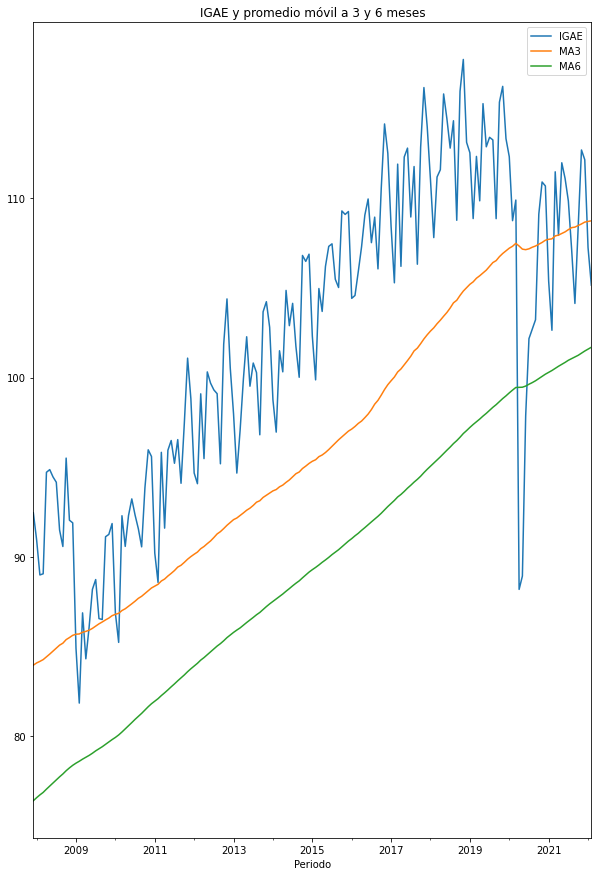

In [262]:
# Vamos a graficar
datos[['IGAE', 'MA3', 'MA6']].plot(figsize=(10,15))
plt.title('IGAE y promedio móvil a 3 y 6 meses')
plt.show()

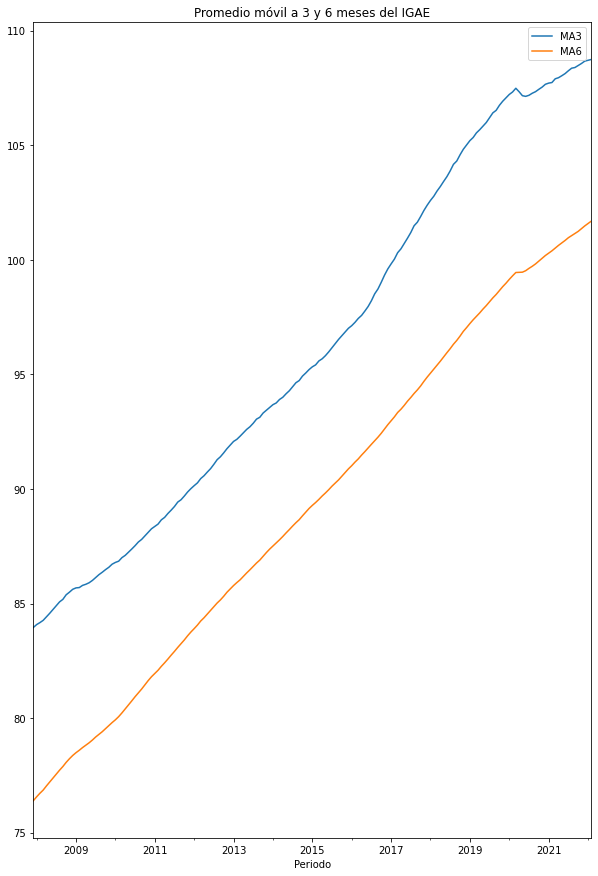

In [263]:
# Vamos a graficar el promedio movil
datos[[ 'MA3', 'MA6']].plot(figsize=(10,15))
plt.title('Promedio móvil a 3 y 6 meses del IGAE')
plt.show()

6. Utiliza la descomposición estacional, para obtener el componente
estacional, y la serie desestacionalizada.

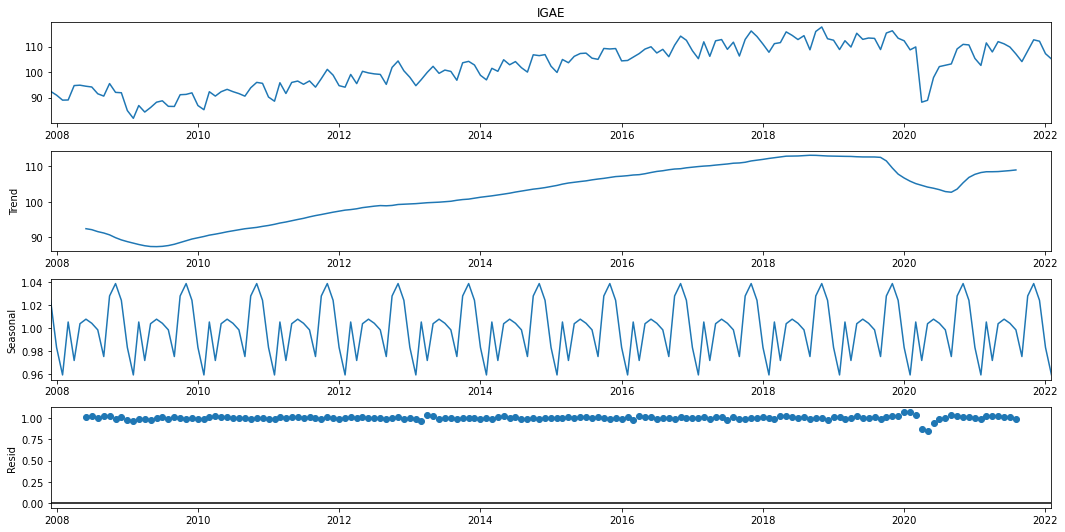

In [264]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(datos['IGAE'], model='multiplicative')  
result.plot();

In [265]:
#vamos a obtener la serie desestacionalida
#primero obtenemos el componente estacional al que accedemos con .seasonal del objeto result
componente_estacional = result.seasonal
datos['desestacionalizado'] = datos['IGAE'] / componente_estacional

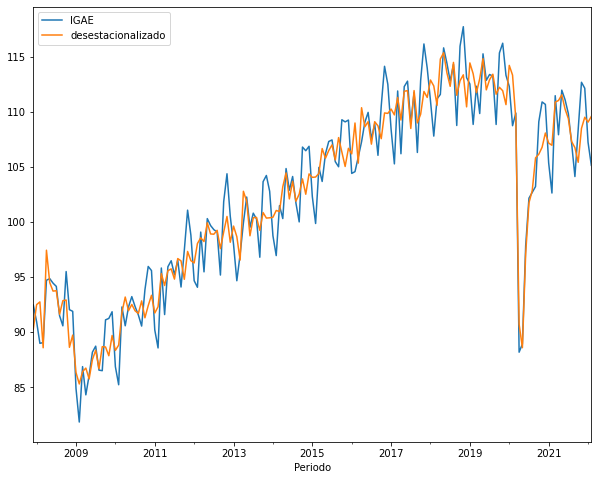

In [266]:
#graficamos
datos[['IGAE','desestacionalizado']].plot(figsize=(10,8));

7. Utiliza la serie desestacionalizada para hacer el análisis ARIMA

In [267]:
# estimamos un ARIMA (1,1)
modelo = ARIMA(datos['desestacionalizado'], order=(1, 1, 1))
resultado = modelo.fit()
resultado.summary()

C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     desestacionalizado   No. Observations:                  171
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -392.502
Date:                Mon, 23 May 2022   AIC                            791.004
Time:                        03:09:51   BIC                            800.411
Sample:                    12-01-2007   HQIC                           794.821
                         - 02-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6473      0.134      4.821      0.000       0.384       0.910
ma.L1         -0.8468      0.117     -7.217      0.000      -1.077      -0.617
sigma2         5.9210      0.201     29.479      0.000       5.527       6.315
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              4241.21
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               2.98   Skew:                            -2.90
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**8. Realiza una prueba de raíz unitaria para verificar si este proceso es
estacionario (sino es estacionario conviértelo en estacionario)**


In [268]:
# Hacemos la prueba de dickey fuller aumentada ADF
adf = adfuller(datos['desestacionalizado'])

#presentamos el p-value
print('p-value: %f' % adf[1])

p-value: 0.674745


Recuerda que $H_0$: serie no estacionaria

In [269]:
if adf[1] < 0.05:
    
    print(f'con un un p-value={adf[1].round(3)}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {adf[1].round(3)}\n NO se rechaza hipótesis nula, serie no estacionaria') 

con un un p-value = 0.675
 NO se rechaza hipótesis nula, serie no estacionaria


In [270]:
datos_diff = datos['desestacionalizado'] - datos['desestacionalizado'].shift()

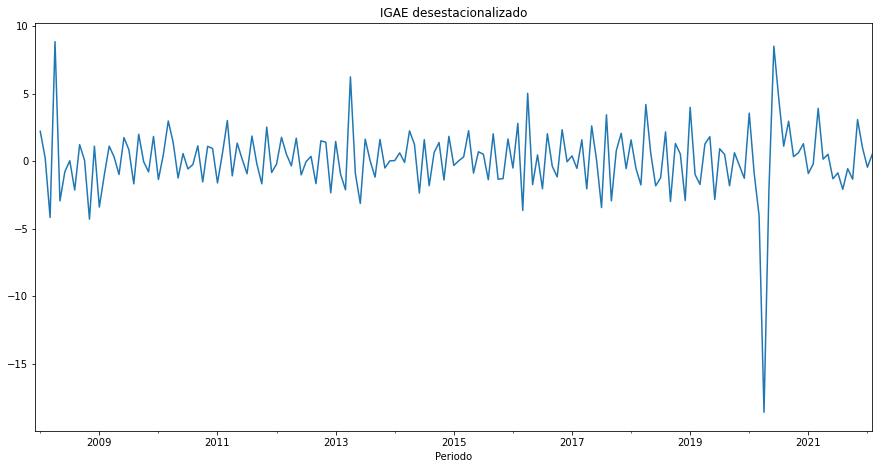

In [271]:
# Graficamos el tipo de cambio diferenciado
datos_diff.plot()
plt.title('IGAE desestacionalizado')
plt.show()

In [272]:
# Eliminamos los Nan
datos_diff = datos_diff.dropna()

datos_diff

Periodo
2008-01-01    2.215035
2008-02-01    0.247268
2008-03-01   -4.163386
2008-04-01    8.859654
2008-05-01   -2.939396
                ...   
2021-10-01   -1.333843
2021-11-01    3.084814
2021-12-01    1.007165
2022-01-01   -0.445424
2022-02-01    0.522948
Name: desestacionalizado, Length: 170, dtype: float64

Volvemos a realizar la prueba de raíz unitaria ADF

In [273]:
adf1 = adfuller(datos_diff)
if adf1[1] < 0.05:
    
    print(f'con un un p-value={adf1[1]}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {adf1[1]}\n NO se rechaza hipótesis nula, serie no estacionaria') 


con un un p-value=9.896124141002856e-15
 Se rechaza hipótesis nula, serie estacionaria


**9. Con el proceso estacionario, realiza las gráficas de autocorrelación (ACF)
y autocorrelación parcial (PACF) y señala como se interpretan y ¿qué tipo
de proceso es tu serie de tiempo AR(p), MA(q) o ARMA(p,q)?**

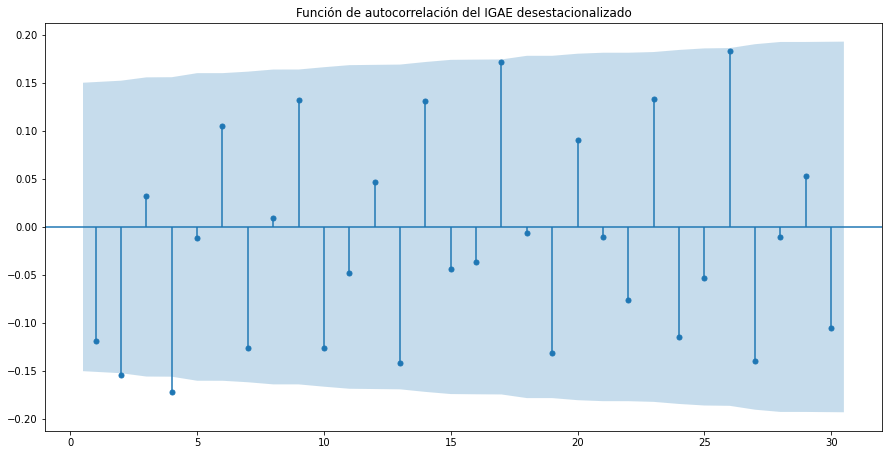

In [274]:
# Grafica de autocorrelación ACF
plot_acf(datos_diff, zero=False, lags=30)
plt.title('Función de autocorrelación del IGAE desestacionalizado')
plt.show()

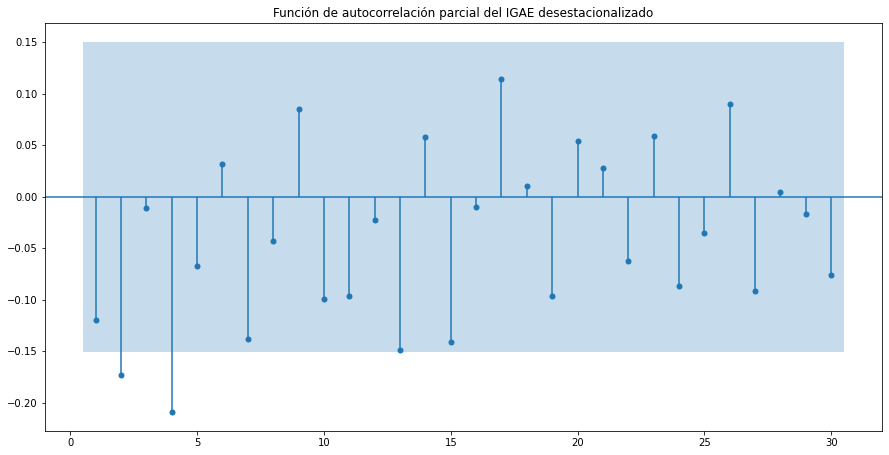

In [275]:
# Grafica de autocorrelación parcial PACF
plot_pacf(datos_diff, zero=False, lags=30)
plt.title('Función de autocorrelación parcial del IGAE desestacionalizado')
plt.show()

En ambos casos solo el segundo y cuarto rezago son significativos, por lo cual podria indicarnos que nuestra serie de tiempo es un  proceso ARMA 2,2

**10. Estima el modelo ARMA que hayas elegido e interpreta los coeficientes**

In [314]:
# Estimamos un ARMA (2,2), como la serie se tuvo que diferenciar una vez para 
# volverla estacionaria, en realidad tenemos un ARIMA (2,1,2)
modelo = ARIMA(datos_diff, order=(2, 1, 2))
resultado = modelo.fit()
resultado.summary()

C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     desestacionalizado   No. Observations:                  170
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -394.931
Date:                Mon, 23 May 2022   AIC                            799.862
Time:                        04:01:52   BIC                            815.511
Sample:                    01-01-2008   HQIC                           806.213
                         - 02-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5929      0.392     -1.513      0.130      -1.361       0.175
ar.L2         -0.2081      0.055     -3.804      0.000      -0.315      -0.101
ma.L1         -0.5265      6.161     -0.085      0.932     -12.602      11.549
ma.L2         -0.4734      3.330     -0.142      0.887      -6.999       6.053
sigma2         6.0653     38.726      0.157      0.876     -69.835      81.966
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3729.50
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               3.49   Skew:                            -2.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [315]:
datos['pronostico'] =resultado.predict()

In [316]:
MAPE = 0
MAD = 0
MSD = 0

for t in range (1,171):
   MAPE = MAPE + abs(((datos['IGAE'][t] - datos['pronostico'][t])/datos['IGAE'][t]))
   MAD = MAD + abs((datos['IGAE'][t] - datos['pronostico'][t]))
   MSD = MSD + abs((datos['IGAE'][t] - datos['pronostico'][t])**2)

MAPE = MAPE/171
MAD = MAD/171
MSD = MSD/171

print(f' El valor de la medida MAPE para el modelo ARMA(2,2) : {MAPE}')
print(f' El valor de la medida MAD para el modelo ARMA(2,2) : {MAD}')
print(f' El valor de la medida MSD para el modelo ARMA(2,2) : {MSD}')

 El valor de la medida MAPE para el modelo ARMA(2,2) : 0.992828460561724
 El valor de la medida MAD para el modelo ARMA(2,2) : 101.50804377839219
 El valor de la medida MSD para el modelo ARMA(2,2) : 10439.463009871046


**11. Estima otros tres modelos que consideres posibles para tu serie de
tiempo. Obtén el criterio akaike (AIC) para cada uno, el criterio bayesiano
de información (BIC), y calcula una de las siguientes tres medidas (la que
quieras) MAPE, MAD, y MSD.**

In [317]:
# 1.- Estimamos un AR (2), como la serie se tuvo que diferenciar una vez para 
# volverla estacionaria, en realidad tenemos un ARIMA (2,1,0)
modelo = ARIMA(datos_diff, order=(2, 1, 0))
resultado1 = modelo.fit()
resultado1.summary()

C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     desestacionalizado   No. Observations:                  170
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -423.995
Date:                Mon, 23 May 2022   AIC                            853.991
Time:                        04:03:57   BIC                            863.380
Sample:                    01-01-2008   HQIC                           857.801
                         - 02-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6948      0.039    -17.683      0.000      -0.772      -0.618
ar.L2         -0.4348      0.031    -13.953      0.000      -0.496      -0.374
sigma2         8.8088      0.456     19.335      0.000       7.916       9.702
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):              1237.59
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               3.95   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [318]:
datos['pronostico1'] =resultado1.predict()

In [319]:
MAPE1 = 0
MAD1 = 0
MSD1 = 0

for t in range (1,171):
   MAPE1 = MAPE1 + abs(((datos['IGAE'][t] - datos['pronostico1'][t])/datos['IGAE'][t]))
   MAD1 = MAD1 + abs((datos['IGAE'][t] - datos['pronostico1'][t]))
   MSD1 = MSD1 + abs((datos['IGAE'][t] - datos['pronostico1'][t])**2)

MAPE1 = MAPE1/171
MAD1 = MAD1/171
MSD1 = MSD1/171

print(f' El valor de la medida MAPE para el modelo AR(2) : {MAPE1}')
print(f' El valor de la medida MAD para el modelo AR(2) : {MAD1}')
print(f' El valor de la medida MSD para el modelo AR(2) : {MSD1}')

 El valor de la medida MAPE para el modelo AR(2) : 0.9989382312905654
 El valor de la medida MAD para el modelo AR(2) : 101.52133537973953
 El valor de la medida MSD para el modelo AR(2) : 10441.027549649147


In [320]:
# 2.- Estimamos un MA (2),como la serie se tuvo que diferenciar una vez para 
# volverla estacionaria, en realidad tenemos un ARIMA (0,1,2)
modelo = ARIMA(datos_diff, order=(0, 1, 2))
resultado2 = modelo.fit()
resultado2.summary()

C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     desestacionalizado   No. Observations:                  170
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -397.045
Date:                Mon, 23 May 2022   AIC                            800.090
Time:                        04:04:22   BIC                            809.480
Sample:                    01-01-2008   HQIC                           803.900
                         - 02-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1678      1.051     -1.111      0.266      -3.227       0.891
ma.L2          0.1680      0.153      1.095      0.274      -0.133       0.469
sigma2         6.2237      6.633      0.938      0.348      -6.776      19.223
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):              3106.72
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               3.49   Skew:                            -2.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [321]:
datos['pronostico2'] =resultado2.predict()

In [322]:
MAPE2 = 0
MAD2 = 0
MSD2 = 0

for t in range (1,171):
   MAPE2 = MAPE1 + abs(((datos['IGAE'][t] - datos['pronostico2'][t])/datos['IGAE'][t]))
   MAD2 = MAD1 + abs((datos['IGAE'][t] - datos['pronostico2'][t]))
   MSD2 = MSD1 + abs((datos['IGAE'][t] - datos['pronostico2'][t])**2)

MAPE2 = MAPE2/171
MAD2 = MAD2/171
MSD2 = MSD2/171

print(f' El valor de la medida MAPE para el modelo MA(2) : {MAPE2}')
print(f' El valor de la medida MAD para el modelo MA(2) : {MAD2}')
print(f' El valor de la medida MSD para el modelo MA(2) : {MSD2}')

 El valor de la medida MAPE para el modelo MA(2) : 0.01168054852849817
 El valor de la medida MAD para el modelo MA(2) : 1.2076674679422101
 El valor de la medida MSD para el modelo MA(2) : 125.51980115622924


In [323]:
# 3.- Estimamos un ARMA (4,4), como la serie se tuvo que diferenciar una vez para 
# volverla estacionaria, en realidad tenemos un ARIMA (4,1,4)
modelo = ARIMA(datos_diff, order=(4, 1, 4))
resultado3 = modelo.fit()
resultado3.summary()

C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     desestacionalizado   No. Observations:                  170
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -382.657
Date:                Mon, 23 May 2022   AIC                            783.313
Time:                        04:04:52   BIC                            811.482
Sample:                    01-01-2008   HQIC                           794.745
                         - 02-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3062      0.143     -2.140      0.032      -0.587      -0.026
ar.L2         -0.0508      0.171     -0.297      0.766      -0.386       0.284
ar.L3          0.8009      0.155      5.162      0.000       0.497       1.105
ar.L4         -0.0437      0.081     -0.538      0.590      -0.203       0.115
ma.L1         -0.7632      0.172     -4.443      0.000      -1.100      -0.427
ma.L2         -0.3511      0.088     -3.986      0.000      -0.524      -0.178
ma.L3         -0.8115      0.242     -3.353      0.001      -1.286      -0.337
ma.L4          0.9370      0.221      4.231      0.000       0.503       1.371
sigma2         5.0957      0.982      5.189      0.000       3.171       7.020
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7708.62
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               3.66   Skew:                            -3.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [324]:
datos['pronostico3'] =resultado3.predict()

In [325]:
MAPE3 = 0
MAD3 = 0
MSD3 = 0

for t in range (1,171):
   MAPE3 = MAPE3 + abs(((datos['IGAE'][t] - datos['pronostico3'][t])/datos['IGAE'][t]))
   MAD3 = MAD3 + abs((datos['IGAE'][t] - datos['pronostico3'][t]))
   MSD3 = MSD3 + abs((datos['IGAE'][t] - datos['pronostico3'][t])**2)

MAPE3 = MAPE3/171
MAD3 = MAD3/171
MSD3 = MSD3/171

print(f' El valor de la medida MAPE para el modelo ARMA(4,4) : {MAPE3}')
print(f' El valor de la medida MAD para el modelo ARMA(4,4) : {MAD3}')
print(f' El valor de la medida MSD para el modelo ARMA(4,4) : {MSD3}')

 El valor de la medida MAPE para el modelo ARMA(4,4) : 0.9927839338011756
 El valor de la medida MAD para el modelo ARMA(4,4) : 101.4921539016541
 El valor de la medida MSD para el modelo ARMA(4,4) : 10434.87443560273


**12. ¿Qué modelo se debería estimar según AIC?**

Según AIC se deberia estimar un modelo ARMA(2,2)

**13.¿Qué modelo se debe estimar según BIC?**

Según BIC se deberia estimar un modelo MA(2)

**14. Qué modelo se debe estimar según la medida elegida (MAPE, MAD,
¿MSD)?**

Ya que las tres medidas son menores tomaremos el modelo MA(2) para hacer el pronóstico

**15. Elige un modelo para hacer pronósticos, y pronóstica uno, dos, tres,
cuatro y cinco periodos. Recuerda que el pronóstico tiene que estar en la
escala de la variable original.**

In [326]:
datos.tail(10)

,IGAE,retorno_simple,MA3,MA6,desestacionalizado,pronostico,pronostico1,pronostico2,pronostico3
Periodo,,,,,,,,,
2021-05-01,111.980980,0.037526,108.033783,100.734892,111.557364,-0.432457,0.975964,0.018154,-1.001860
2021-06-01,111.110974,-0.007769,108.126109,100.844572,110.258922,0.339464,1.900113,0.046306,0.411480
2021-07-01,109.853143,-0.011320,108.249421,100.963984,109.395165,0.107240,-0.196814,0.347163,-1.750938
2021-08-01,107.148949,-0.024616,108.362670,101.057888,107.312420,0.532088,-0.376765,0.318620,-0.357590
2021-09-01,104.134227,-0.028136,108.391997,101.148250,106.760815,0.367287,-1.424781,0.505259,0.601232
2021-10-01,108.358461,0.040565,108.481330,101.241367,105.426972,0.502911,-1.085431,0.275338,-1.351753
2021-11-01,112.694729,0.040018,108.568374,101.361086,108.511785,0.199785,-1.456094,0.359521,0.438368
2021-12-01,112.152267,-0.004814,108.671243,101.479369,109.518950,-0.009690,0.354792,-0.350955,0.337045
2022-01-01,107.249365,-0.043716,108.705806,101.581992,109.073526,-0.567536,0.529449,-0.115823,-1.804346


In [327]:
# vamos a estimar la serie con el modelo MA(2)
datos['pronostico3'] = resultado3.predict()
datos['pronostico3'][0] = datos['IGAE'][0]

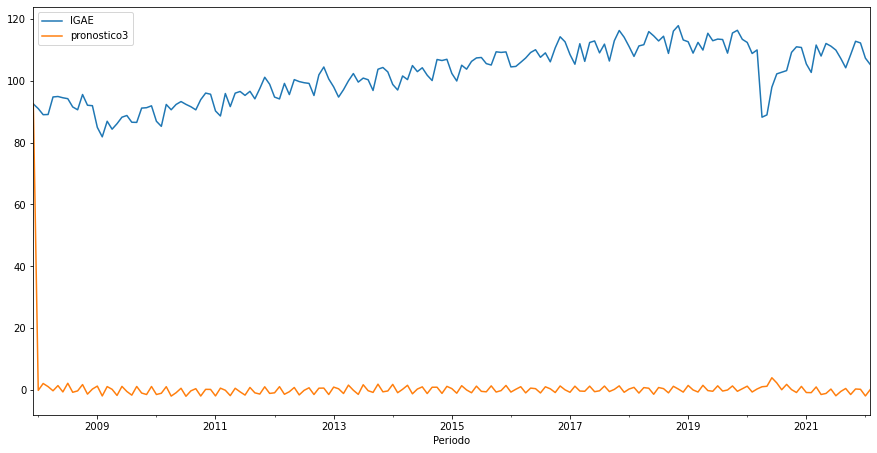

In [328]:
datos[['IGAE', 'pronostico3']].plot()
plt.show()

In [307]:
#calculamos cuantas observaciones tenemos para hacer nuestra predicción
len(datos)

171

**16. Por último, comenta que debilidades o limitaciones tienen los modelos
ARIMA**